In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from PIL import Image

## Switch figure style

In [2]:
import matplotlib.style as style
print(style.available)
style.use('seaborn')
# style.use('ggplot')
# style.use('seaborn-muted')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


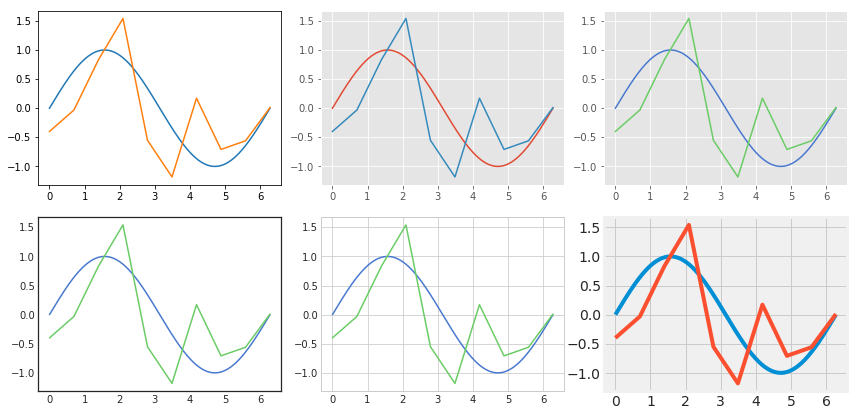

In [3]:
sin_x = np.linspace(0, (2*np.pi), 1000)
sin_y = np.sin(sin_x)
data_x = np.linspace(0, (2*np.pi), 10)
data_y = np.sin(data_x) + np.random.randn(10) * 0.5

plt.figure(figsize=(12,6))
style.use('default')
ax1 = plt.subplot(2,3,1)
ax1.plot(sin_x, sin_y)
ax1.plot(data_x, data_y)

style.use('ggplot')
ax2 = plt.subplot(2,3,2)
ax2.plot(sin_x, sin_y)
ax2.plot(data_x, data_y)

style.use('seaborn-muted')
ax3 = plt.subplot(2,3,3)
ax3.plot(sin_x, sin_y)
ax3.plot(data_x, data_y)

style.use('seaborn-white')
ax4 = plt.subplot(2,3,4)
ax4.plot(sin_x, sin_y)
ax4.plot(data_x, data_y)

style.use('seaborn-whitegrid')
ax5 = plt.subplot(2,3,5)
ax5.plot(sin_x, sin_y)
ax5.plot(data_x, data_y)

style.use('fivethirtyeight')
ax6 = plt.subplot(2,3,6)
ax6.plot(sin_x, sin_y)
ax6.plot(data_x, data_y)
plt.tight_layout()

style.use('seaborn-notebook')

## Grid visualization
Can be used for weights visulization, etc.

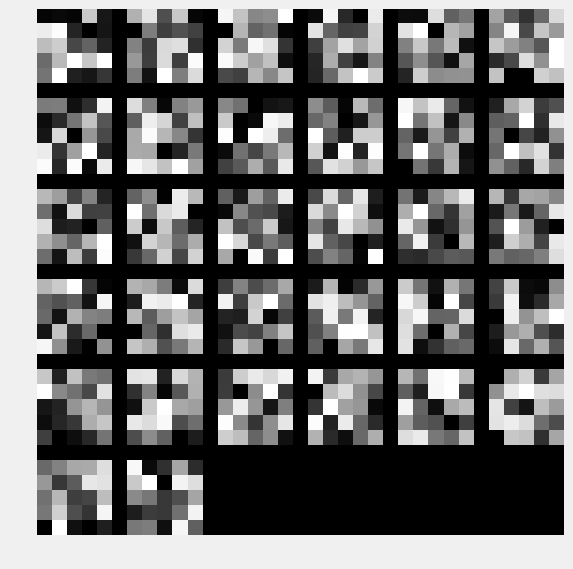

In [4]:
def visualize_grid(weights, ubound=255.0, padding=2):
    """
    Reshape a 4D tensor of image data to a grid for easy visualization.

    Inputs:
    - Xs: Data of shape (N, H, W, C)
    - ubound: Output grid will have values scaled to the range [0, ubound]
    - padding: The number of blank pixels between elements of the grid
    """
    N, H, W, C = weights.shape
    grid_size = int(np.ceil(np.sqrt(N)))
    grid_height = H * grid_size + padding * (grid_size - 1)
    grid_width = W * grid_size + padding * (grid_size - 1)
    grid = np.zeros((grid_height, grid_width, C))
    next_idx = 0
    y0, y1 = 0, H
    for y in range(grid_size):
        x0, x1 = 0, W
        for x in range(grid_size):
            if next_idx < N:
                img = weights[next_idx]
                low, high = np.min(img), np.max(img)
                grid[y0:y1, x0:x1] = ubound * (img - low) / (high - low)
                # grid[y0:y1, x0:x1] = Xs[next_idx]
                next_idx += 1
            x0 += W + padding
            x1 += W + padding
        y0 += H + padding
        y1 += H + padding
    grid_max = np.max(grid)
    grid_min = np.min(grid)
    grid = ubound * (grid - grid_min) / (grid_max - grid_min)
    return grid

def plot_weights(weights):
    grid = visualize_grid(weights, ubound=255, padding=1).squeeze()
#     plt.figure(figsize=(10, 10))
    if len(grid.shape) == 3:
        plt.imshow(grid)
    elif len(grid.shape) == 2:
        plt.imshow(grid, cmap='gray')
    # set padding to zero
    plt.tight_layout(pad=0)
    plt.axis('off')

weights = np.random.rand(32,5,5,1)
plot_weights(weights)

## Plots with different scales and axis

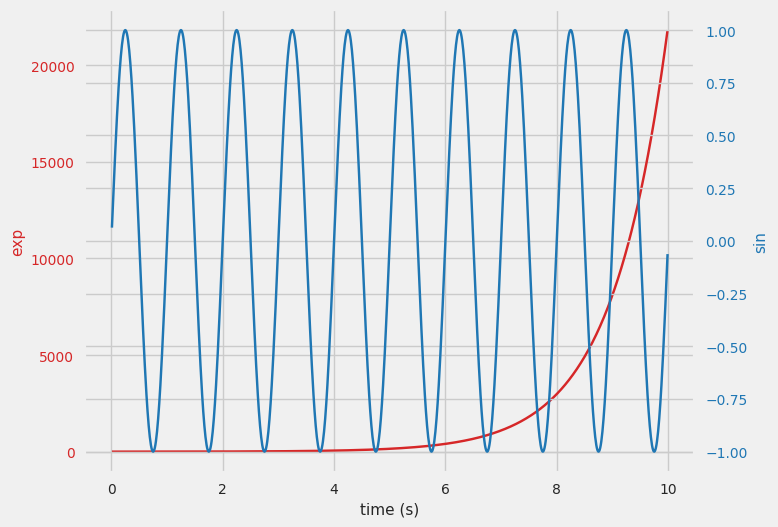

In [5]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

## Convert matplotlib figure to numpy array
Method-1

1600 1100
(1100, 1600, 3) (1100, 1600, 4) (1100, 1600, 4)


(-0.5, 1599.5, 1099.5, -0.5)

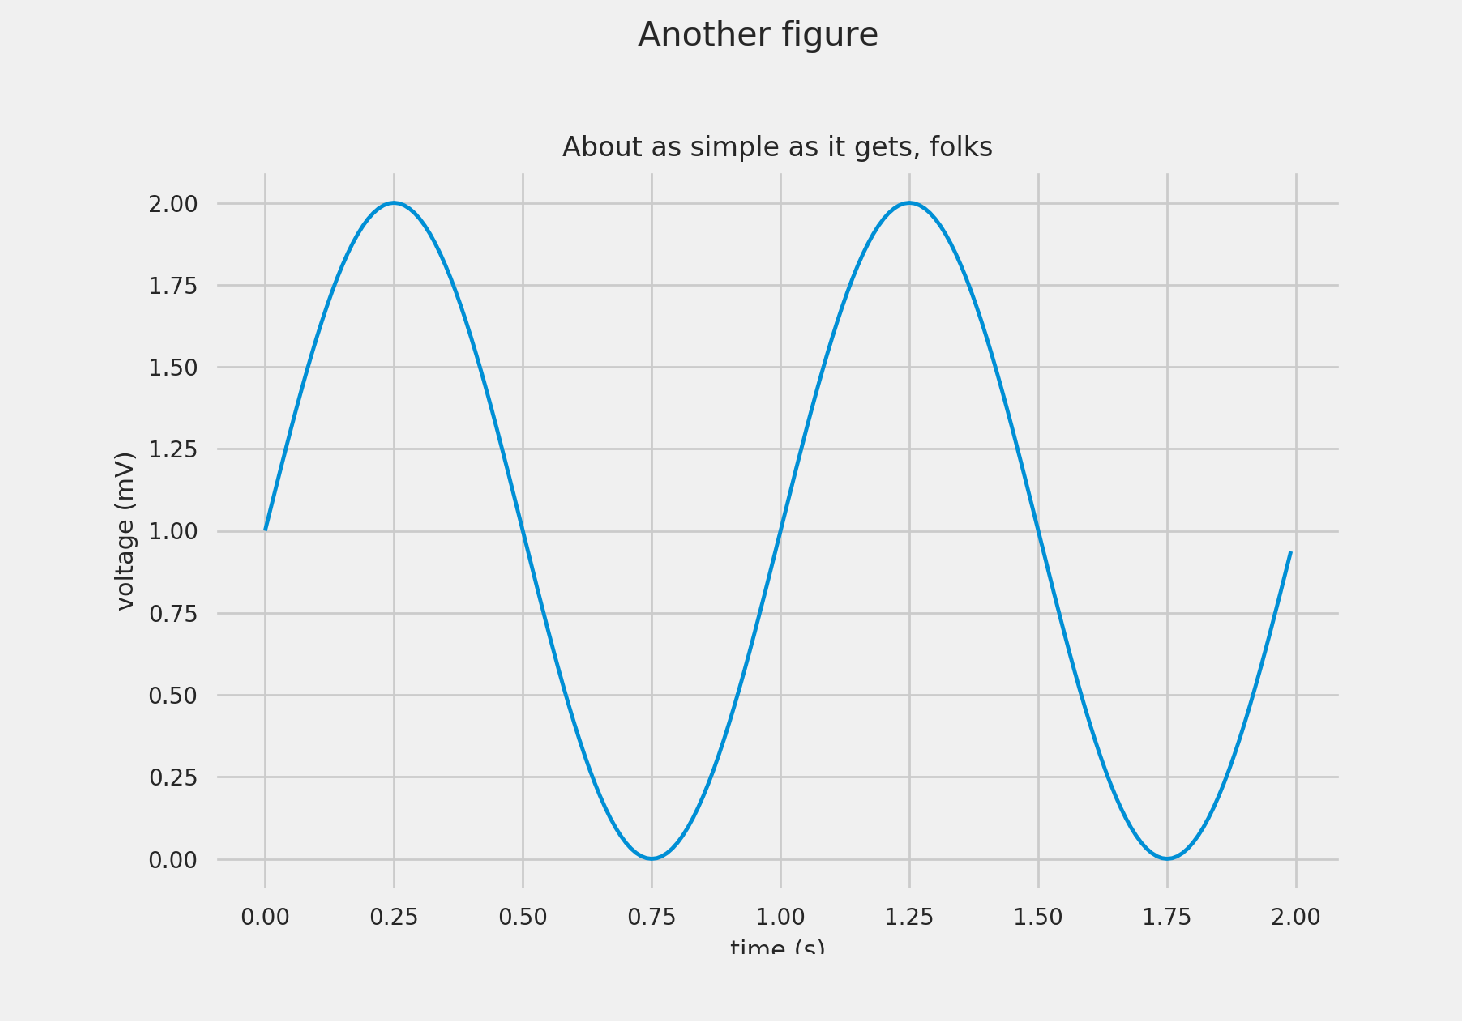

In [6]:
from matplotlib.backends.backend_agg import FigureCanvas
from matplotlib.figure import Figure

fig = Figure(dpi=200)
canvas = FigureCanvas(fig)
ax = fig.gca()
w, h = canvas.get_width_height()
print(w, h)

t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

ax.plot(t, s)
ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
# ax.grid()

canvas.draw()
# rgb
image_rgb = np.frombuffer(canvas.tostring_rgb(), dtype=np.uint8).reshape(h, w, 3)
# argb
image_argb = np.frombuffer(canvas.tostring_argb(), dtype=np.uint8).reshape(h, w, 4)
# argb to rgba
image_argb = np.roll(image_argb, 3, axis=2)
# rgba
image_rgba = np.frombuffer(canvas.buffer_rgba(), dtype=np.uint8).reshape(h, w, 4)
plt.close()

print(image_rgb.shape, image_rgba.shape, image_rgba.shape)
plt.figure(dpi=200)
plt.imshow(image_rgba)
plt.title('Another figure')
plt.axis('off')

Method 2:  
Encapsulate it in the function, input a rendered fig and return a RGB picture.

In [7]:
def fig2array(fig):
    """
    @brief Convert a Matplotlib figure to a 3D numpy array with RGB channels and return it
    @param fig a matplotlib figure
    @return a numpy 3D array of RGB values
    """
    # draw the renderer
    fig.canvas.draw()

    # Get the RGBA buffer from the figure
    w, h = fig.canvas.get_width_height()
    array = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8)
    array = array.reshape(h, w, 3)

    return array

## Add transparent layer on figure

0.9998664933889716 0.0015977349226458104
0.19986649338897156 0.0


/usr/local/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


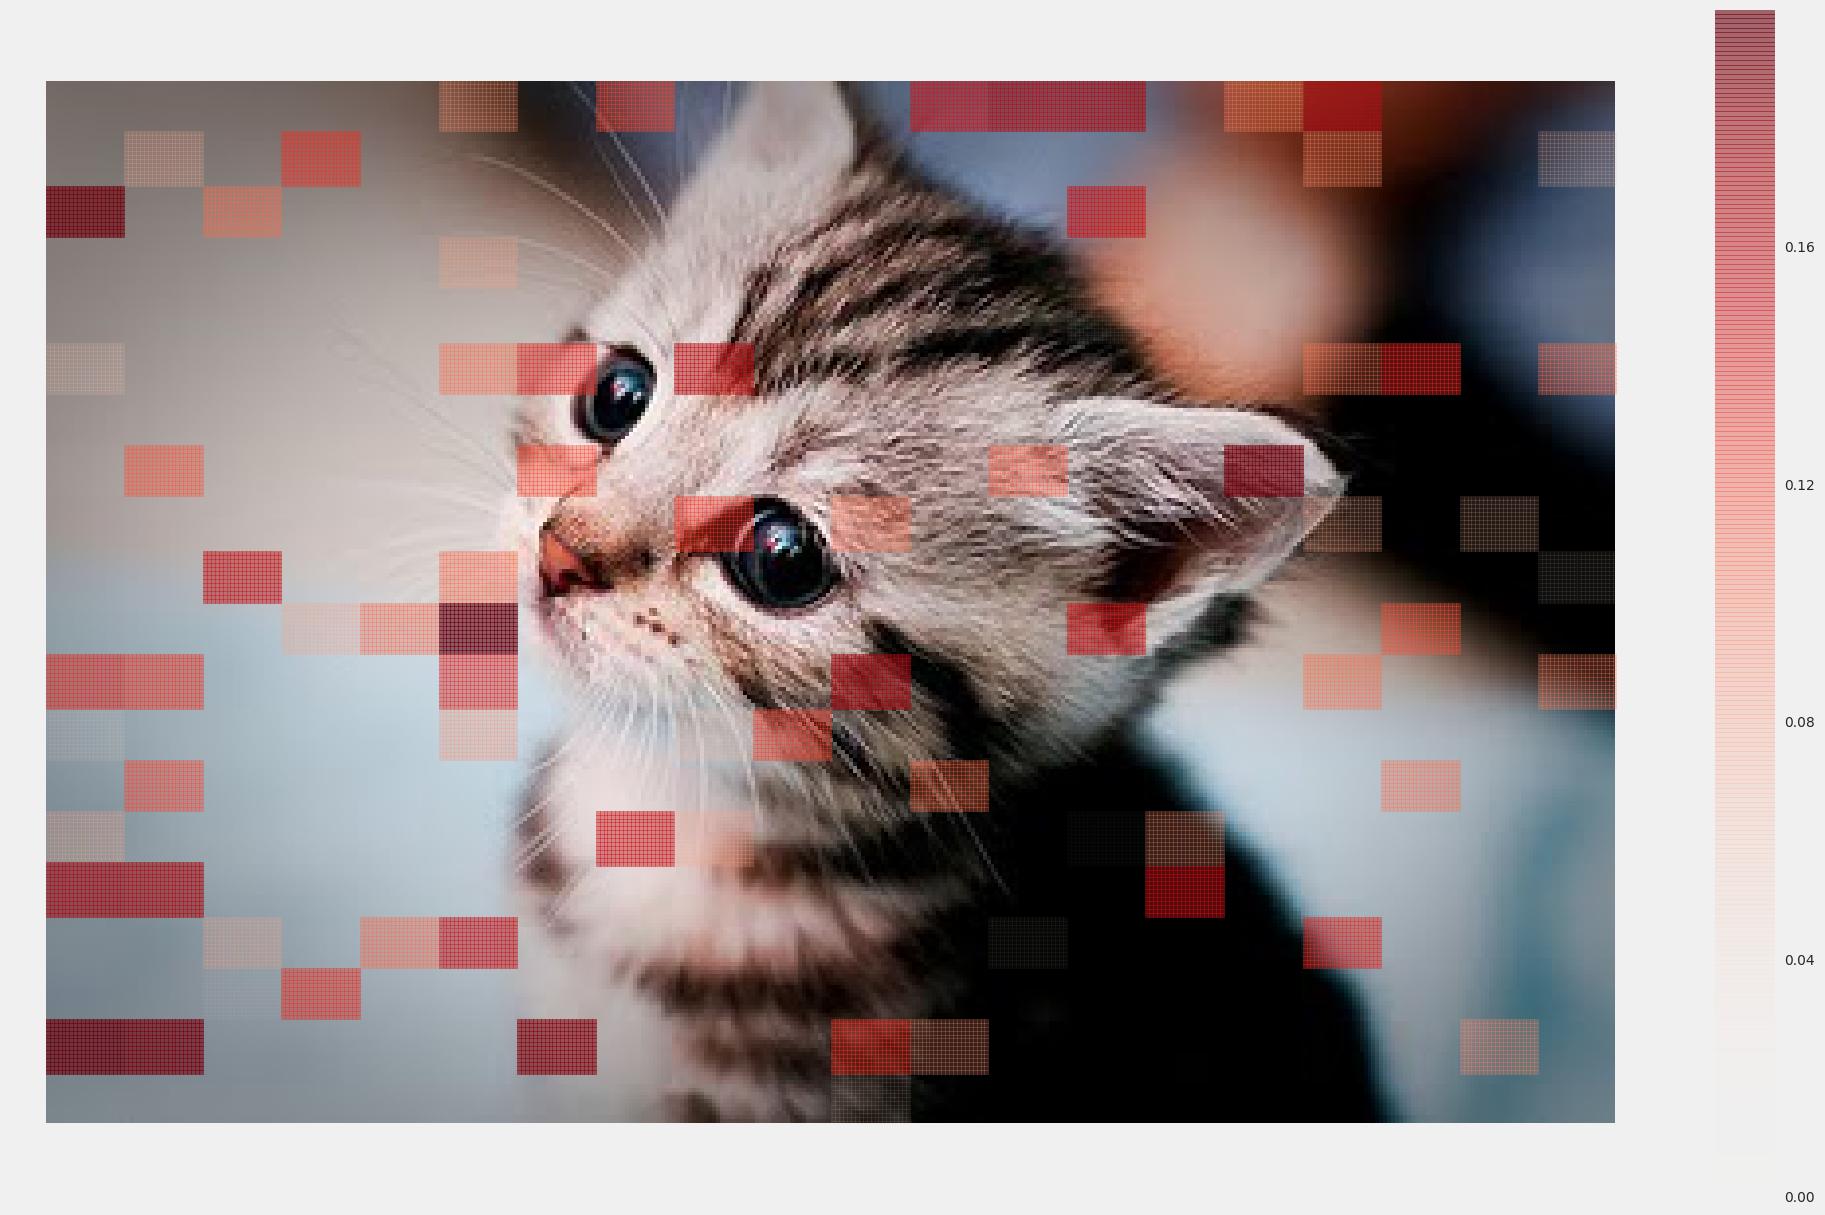

In [8]:
def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"
    mycmap = cmap
    mycmap._init()
    colorbar = np.linspace(0., 0.6, N + 4)
    mycmap._lut[:, -1] = colorbar
    return mycmap


def plot_threshold_map(source, result, threshold):
    from skimage.transform import resize
    print(result.max(), result.min())
    
    result = np.maximum(0, result - threshold)
    result = resize(result, source.shape[:2], order=0, mode='reflect')
    print(result.max(), result.min())

    plt.figure(figsize=[20, 12])
    ax = plt.subplot(111)
    ax.imshow(source)
    cmap = transparent_cmap(plt.cm.Reds)
    sns.heatmap(result, cmap=cmap, ax=ax)
    ax.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

source = np.array(Image.open('kitten.jpg'))
result = np.random.random([20,20])
# result = np.zeros([20,20])
threshold = 0.8
plot_threshold_map(source, result, threshold)

## Set axies range of figure

(0.0, 10)

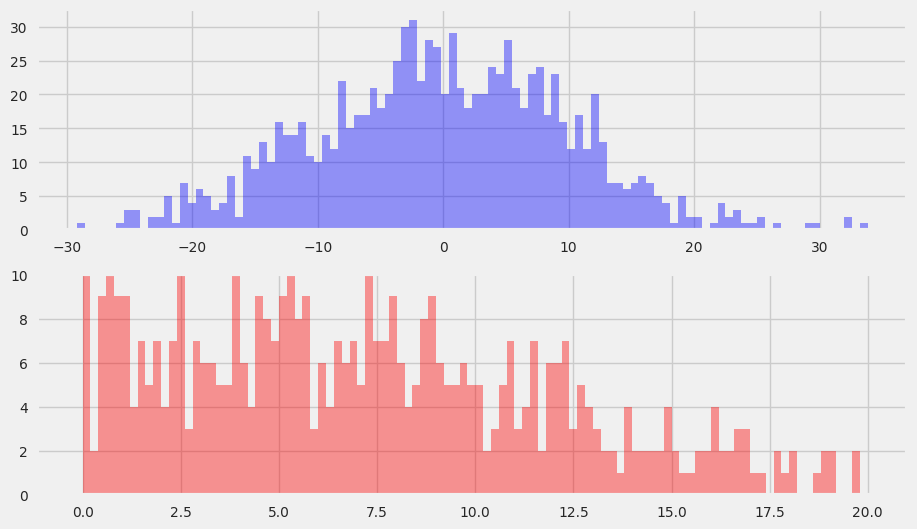

In [9]:
t=np.random.normal(0,10,1000)
plt.figure(figsize=(10,6))
ax1=plt.subplot(211)
sns.distplot(t, bins=100, kde=False, hist_kws=dict(histtype='bar', cumulative=0, color='B'), label='Defect', ax=ax1)
ax2=plt.subplot(212)
sns.distplot(t, bins=100, kde=False, hist_kws=dict(histtype='bar', cumulative=0, color='R', range=(0,20)),label='Defect')
# Set the limits for the axis
ax2.set_ylim(top=10)

## Plot 2 CDF and average distance between distribution

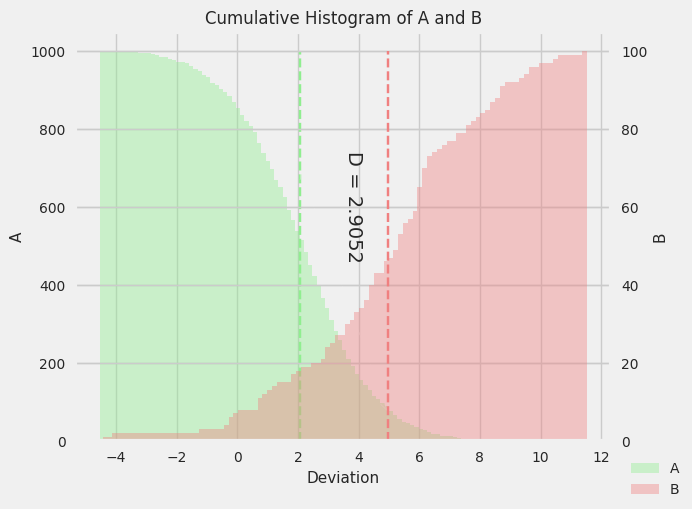

In [10]:
def plot_deviation_hist(data_A, data_B, bins=100):
    red = 'lightcoral'
    green = 'lightgreen'
    data_A = data_A.flatten()
    data_B = data_B.flatten()
    mean_A, mean_B = data_A.mean(), data_B.mean()
    # size is the heigth of the average line
    size_A, size_B = data_A.size, data_B.size
    fig, ax1 = plt.subplots(figsize=[7, 14])
    ax1 = plt.subplot(313)
    sns.distplot(data_A, bins=bins, kde=False,
                 hist_kws=dict(histtype='stepfilled', cumulative=-1), color=green,
                 label='A', ax=ax1)
    ax2 = ax1.twinx()
    sns.distplot(data_B, bins=bins, kde=False,
                 hist_kws=dict(histtype='stepfilled', cumulative=1), color=red,
                 label='B', ax=ax2)
    
    # add linse to axes
    ax1.vlines(mean_A, 0, size_A, colors=green, linestyles='dashed')
    ax2.vlines(mean_B, 0, size_B, colors=red, linestyles='dashed')

    ax1.annotate('', xy=(mean_A, size_A*0.7), xycoords='data',
                 xytext=(mean_B, size_B*0.7), textcoords='data',
                 arrowprops={'arrowstyle': '<->'})
    ax1.annotate('D = %.4f' % (mean_B - mean_A),
                  xy=((mean_A + mean_B) / 2, size_A*0.7), xycoords='data', rotation=-90,
                  xytext=(0, 2), textcoords='offset points')

    ax1.set_title('Cumulative Histogram of A and B')
    ax1.set_xlabel('Deviation')
#     ax1.set_yscale('log')
    ax1.set_ylabel('A')
#     ax2.set_yscale('log')
    ax2.set_ylabel('B')
    fig.legend(loc='lower right')
    
    fig.tight_layout()

A = np.random.normal(loc=2., scale=2., size=[1000])
B = np.random.normal(loc=5., scale=3., size=[100])
plot_deviation_hist(data_A=A, data_B=B)

## Append plot to previous figure at notebook

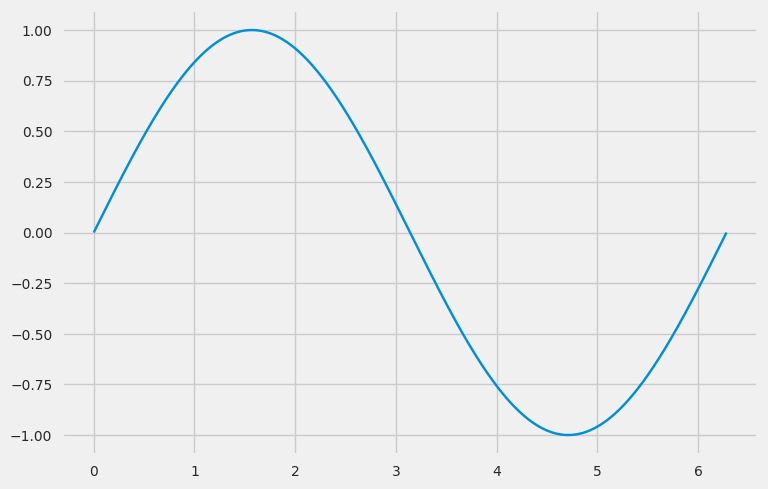

In [11]:
fig, ax = plt.subplots()
sin_x = np.linspace(0, (2*np.pi), 1000)
sin_y = np.sin(sin_x)
ax.plot(sin_x, sin_y)

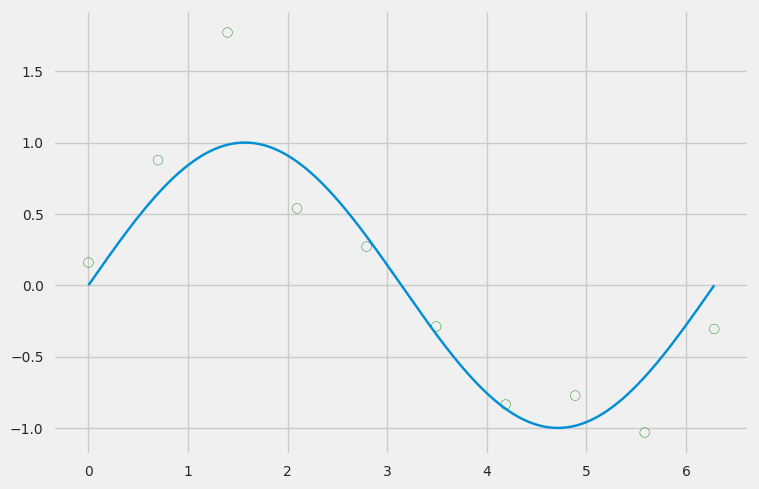

In [12]:
data_x = np.linspace(0, (2*np.pi), 10)
data_y = np.sin(data_x) + np.random.randn(10) * 0.5
ax.scatter(data_x, data_y, marker='o', c='', edgecolors='g')
fig

## Using pandas and seaborn
pandas makes it easy to manage your data and visulization for seaborn

Generate some data

In [13]:
import pandas as pd

num_dimensions = 2
num_clusters = 4
cluster_points = 100
centers_separation = 4
centers = np.array([(0,0), (1,0), (0,1), (1,1)], dtype=float) * centers_separation
data = np.zeros((num_clusters * cluster_points, num_dimensions), dtype=float)

labels = np.zeros(num_clusters * cluster_points, dtype=np.object)
for c in range(num_clusters):
    start = c * cluster_points
    end = start + cluster_points
    data[start:end, :] = np.random.randn(cluster_points, num_dimensions) + centers[c]
    labels[start:end] = 'class-%d' % c
print(data.shape)
df = pd.DataFrame(data, columns=('X','Y'))
# df['X'] = data[:, 0]
# df['Y'] = data[:, 1]
df['label'] = labels
df.head()

(400, 2)


,X,Y,label
0,-1.397816,-1.038203,class-0
1,0.806759,-0.072886,class-0
2,0.362405,-0.212513,class-0
3,-0.406340,0.632359,class-0
4,-1.580003,-0.184519,class-0


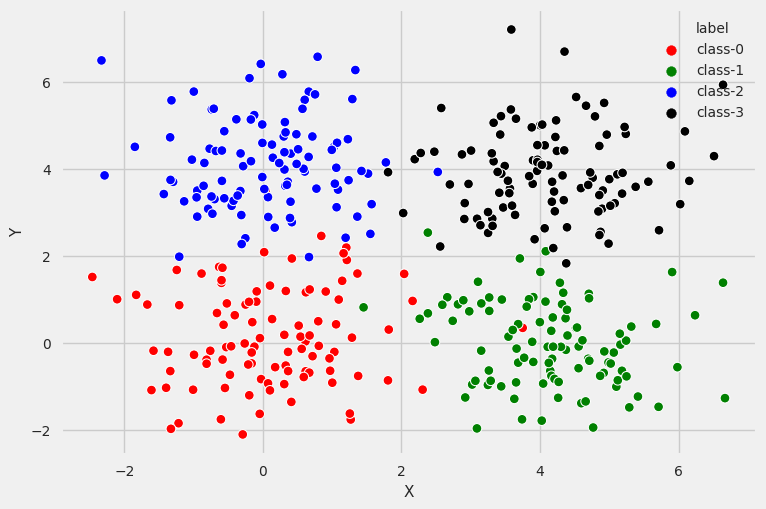

In [14]:
color = {'class-0':'r', 'class-1':'g', 'class-2':'b', 'class-3':'k'}
# color = sns.color_palette(['r','g','b','k'], desat=0.3)
sns.scatterplot(x='X', y='Y', data=df, hue='label', palette=color,);

## Nice color palette of seaborn

Note that: these color will repeat if n_colors is large

In [15]:
def plot_palette(palette_name=None):
    palette = sns.color_palette(palette_name)
    print('%s length: %d' % (palette_name, len(palette)))
    sns.palplot(palette, size=0.5)
    plt.show()

#### These color palettes are discrete with different lengths and a higher differentiation. 
##### Note that: They will be repeated if you specify parameter "n_colors" large than their length.

None length: 6


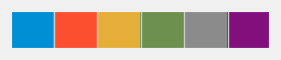

bright length: 10


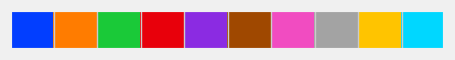

muted length: 10


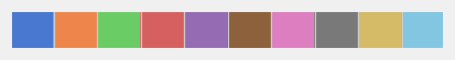

Set1 length: 9


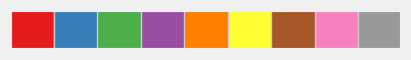

Set2 length: 8


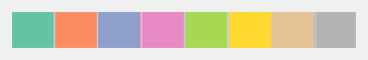

tab10 length: 10


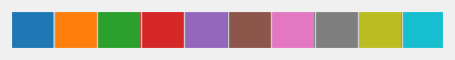

tab20 length: 20


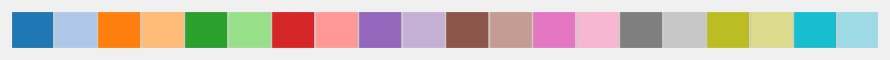

tab20b length: 20


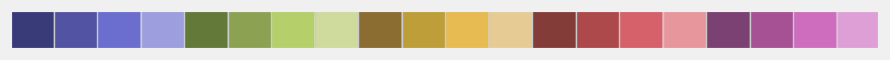

tab20c length: 20


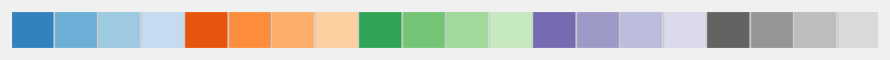

Paired length: 12


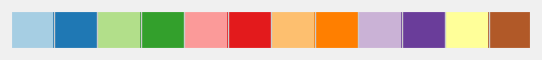

In [16]:
# these color palettes will repeat if n_colors is large
plot_palette()
plot_palette("bright")
plot_palette("muted")
plot_palette("Set1")
plot_palette("Set2")

plot_palette('tab10')
plot_palette('tab20')
plot_palette('tab20b')
plot_palette('tab20c')

plot_palette("Paired")

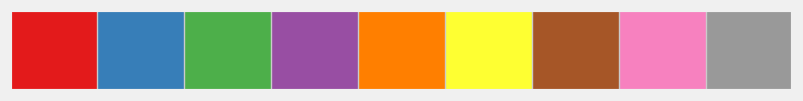

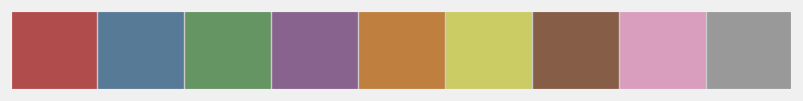

In [17]:
# desat: optional Proportion to desaturate each color by
sns.palplot(sns.color_palette("Set1", desat=1.0))
sns.palplot(sns.color_palette("Set1", desat=0.5))

#### These color from continuous palettes, they won't be repeated, but may have similar color

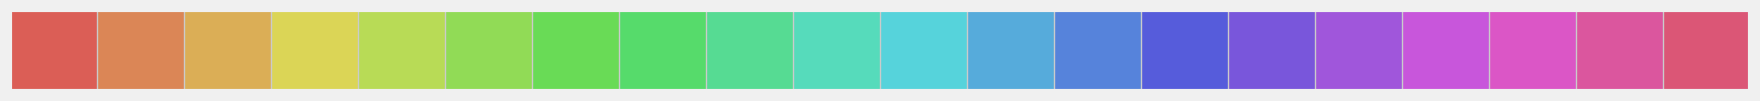

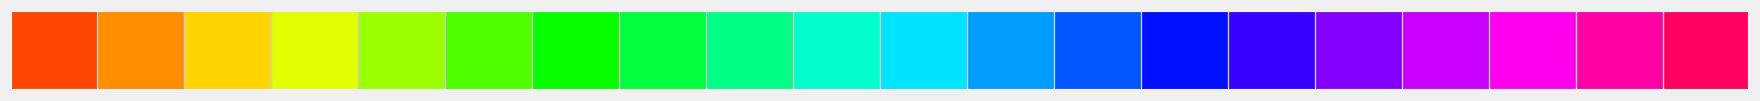

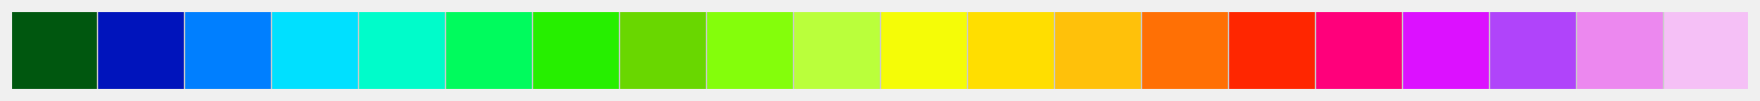

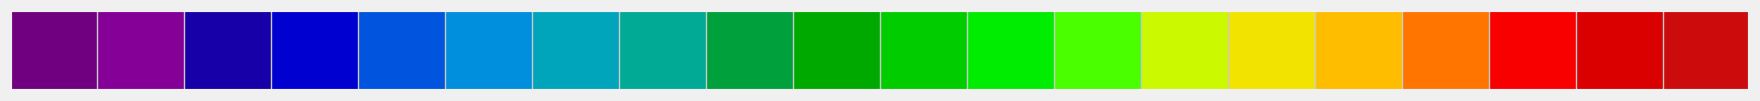

In [18]:
# these color palettes won't be repeated, but may be similar
sns.palplot(sns.color_palette('hls',20))
sns.palplot(sns.color_palette("hsv", 20))

sns.palplot(sns.color_palette('gist_ncar', 20))
sns.palplot(sns.color_palette('nipy_spectral', 20))

### Save figure images without any white border or margin

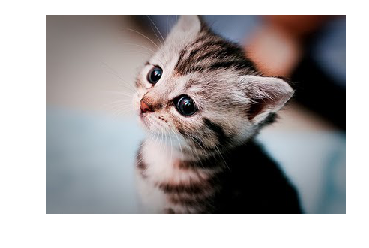

In [22]:
img = plt.imread('kitten.jpg')
# note: set frame off
plt.figure(figsize=(3, 3), frameon=False)
plt.imshow(img)

plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.axis("off")
plt.show()